# 9. Plotting and Visualization

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
pd.options.display.max_columns = 20

np.random.seed(12345)

import matplotlib.pyplot as plt
import matplotlib

plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

## 1. A Brief matplotlib API Primer

In [2]:
import matplotlib.pyplot as plt

In [ ]:
# %matplotlib notebook

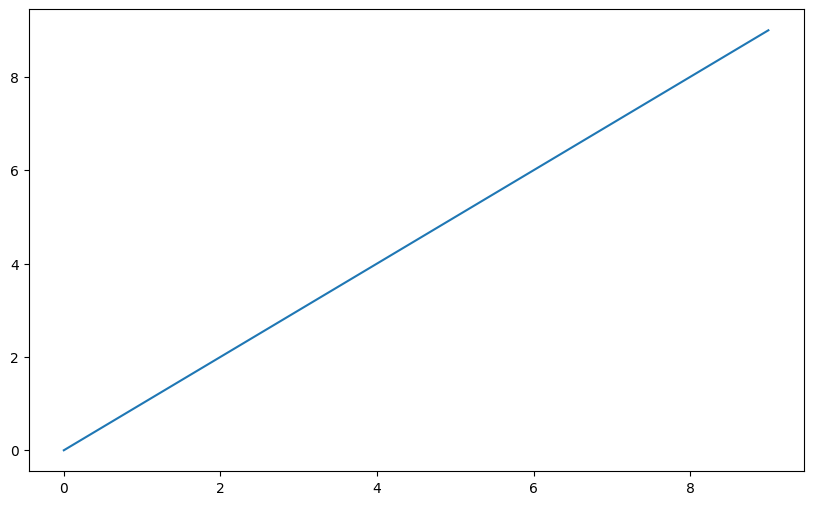

In [3]:
data = np.arange(10)
data
plt.plot(data)

### 1.1. Figures and Subplots  

- matplotlib로 만들어진 plot은 figure 객체로 정의됨.  

- 새로운 figure 객체 생성 : ```fig = plt.figure()```  

- ```fig.add_subplot``` : 2개의 정수를 받아서 행과 열의 개수를 결정하고, 세 번째 정수는 현재 추가되는 subplot의 위치를 지정.  

- ```fig.add_subplot``` 대신 ```matplotlib.pyplot.subplots``` 메서드를 사용하면 더 간단하게 여러 개의 subplot을 생성 가능.  

    - subplot 객체를 포함한 numpy 배열을 반환.  

        | 인수 | 설명 |  
        |------|------|  
        | **nrows** | 서브플롯의 행 수 |  
        | **ncols** | 서브플롯의 열 수 |  
        | **sharex** | 모든 서브플롯이 동일한 x축 눈금을 사용해야 함 (xlim 조정이 모든 서브플롯에 영향을 미침, 비교에 용이) |  
        | **sharey** | 모든 서브플롯이 동일한 y축 눈금을 사용해야 함 (ylim 조정이 모든 서브플롯에 영향을 미침, 비교에 용이) |  
        | **subplot_kw** | 각 서브플롯을 생성하는 데 사용되는 add_subplot 호출에 전달되는 키워드 딕셔너리 |  
        | **fig_kw** | 그림을 생성할 때 사용되는 추가 키워드 (예: plt.subplots(2, 2, figsize=(8, 6))) |


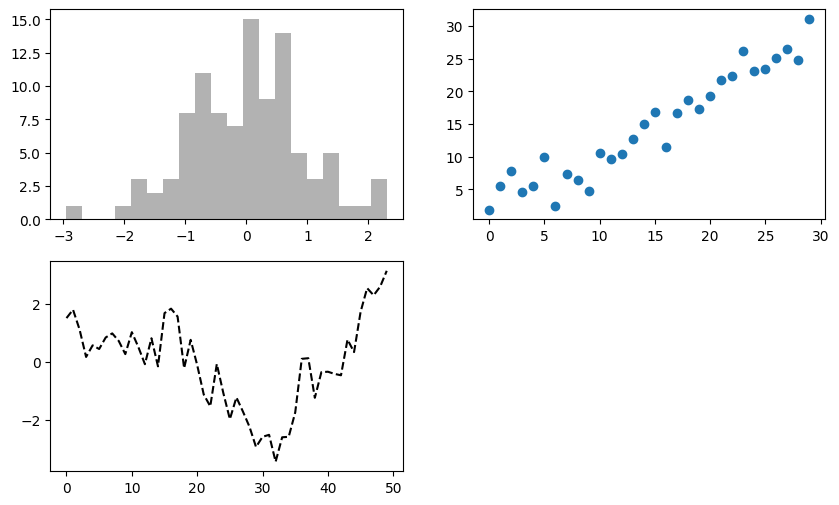

In [ ]:
# 새로운 figure 객체 생성
fig = plt.figure()

# add_subplot : 2개의 정수를 받아서 행과 열의 개수를 결정하고, 세 번째 정수는 현재 추가되는 subplot의 위치를 지정.
# subplot 객체 생성
# 2x2 형태의 subplot 생성
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
# ax4 = fig.add_subplot(2, 2, 4)
# ax5 = fig.add_subplot(2, 2, 5)

ax1.hist(np.random.standard_normal(100), bins=20, color="black", alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30))
ax3.plot(np.random.standard_normal(50).cumsum(), color="black", linestyle="dashed");

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

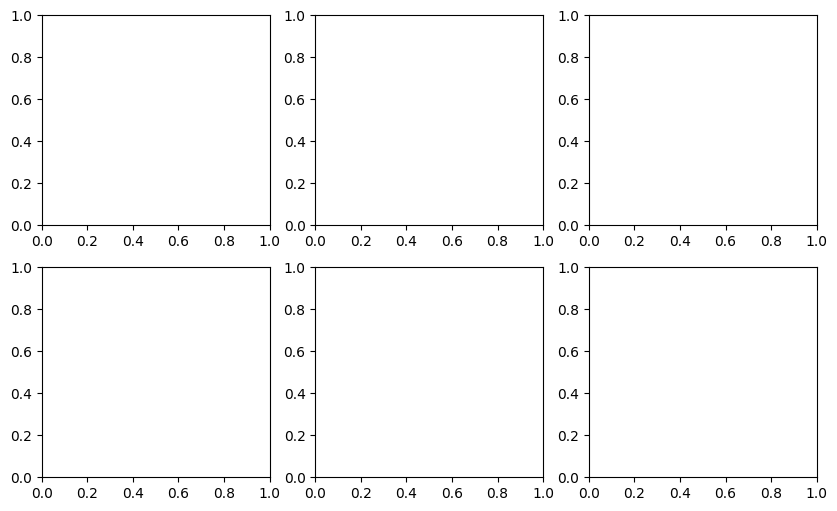

In [ ]:
# add_subplot 대신 subplots 메서드를 사용하면 더 간단하게 여러 개의 subplot을 생성 가능.
# subplot 객체를 포함한 numpy 배열을 반환.
fig, axes = plt.subplots(2, 3)
axes

#### 1.1.1. Adjusting the spacing around subplots  

- ```fig.subplot_adjust``` 메소드를 사용해 figure 객체의 여백을 조정 가능  


- ```subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)```

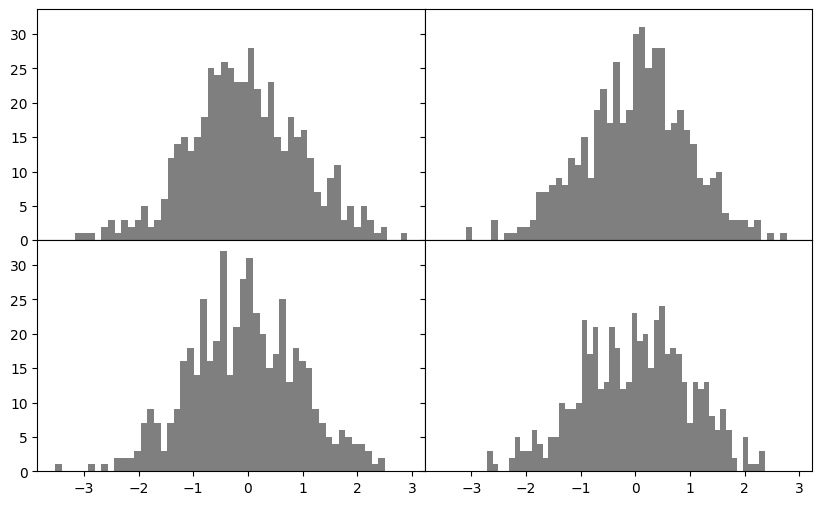

<Figure size 1000x600 with 0 Axes>

In [23]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(500), bins=50, color="black", alpha=0.5);
        
# 여백 조정
fig.subplots_adjust(wspace=0, hspace=0);
fig = plt.figure();

### 1.2. Colors, Markers, and Line Styles  

- color 조정 : color 옵션 사용, 실제 색상명 혹은 헥사코드를 사용하여 색상을 조정함.  

- maker : 실제 데이터 포인트가 어디인지를 나타내는 marker 생성.  


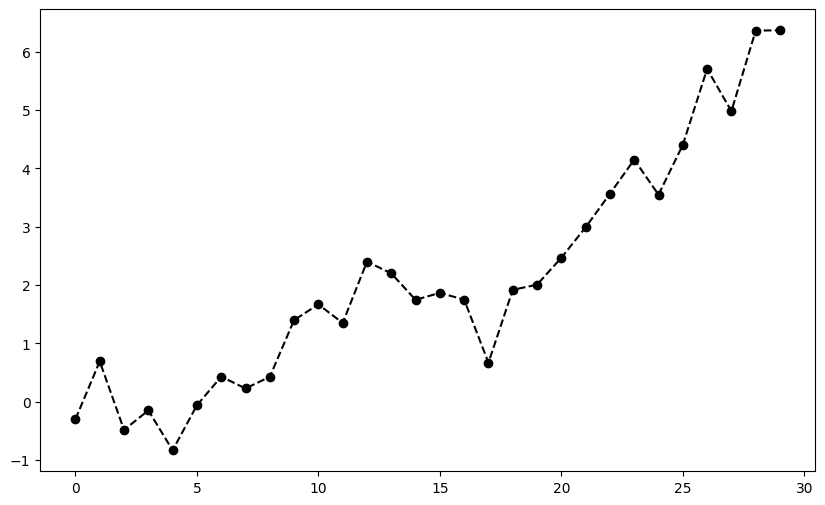

In [31]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(np.random.standard_normal(30).cumsum(), color="black", linestyle="dashed", marker="o");

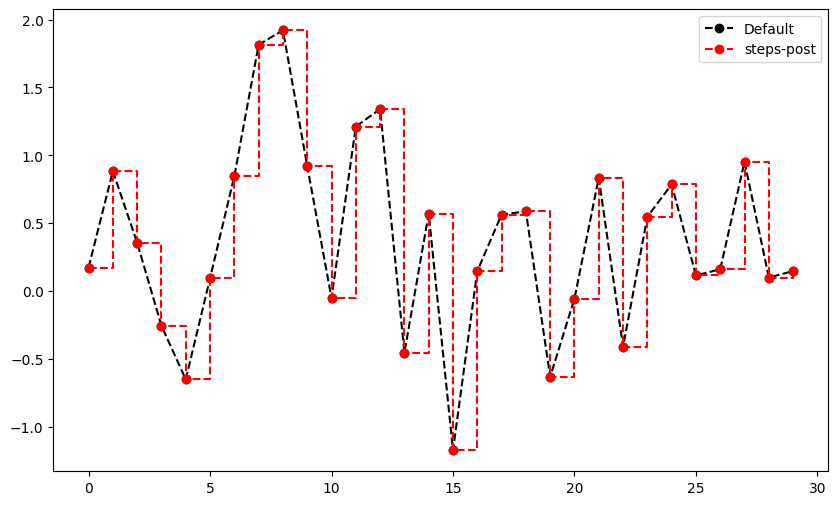

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

data = np.random.standard_normal(30).cumsum()
ax.plot(data, color="black", linestyle="dashed", marker="o", label="Default");

# 기본적으로는 데이터 포인트 사이를 직선으로 보간하여 선을 그림.
# drawstyle : 데이터 포인트 사이에 선을 그리는 방법을 결정.
ax.plot(data, color="red", linestyle="dashed", marker="o", drawstyle="steps-post", label="steps-post");
ax.legend()

### 1.3. Ticks, Labels, and Legends  


#### 1.3.1. Setting the title, axis labels, ticks, and tick labels  

- ```fig, ax = plt.subplots()```  

- ```ax.set_xticks``` : x축 눈금 위치 설정 (y축의 경우 x만 y로 변경하여 세팅)  

- ```ax.set_xticklabels``` : x축 눈금 라벨 설정 (y축의 경우 x만 y로 변경하여 세팅)  

- ```ax.set_xlabel``` : x축 라벨 설정 (y축의 경우 x만 y로 변경하여 세팅)  

- ```ax.set_title``` : 그림 제목 설정  

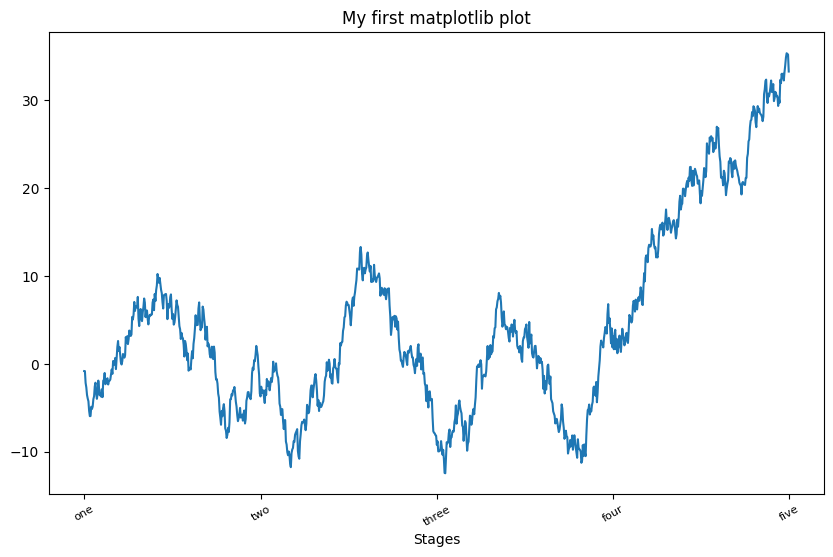

In [ ]:
fig, ax = plt.subplots()

# set_xticks : x축 눈금 위치 설정
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

# set_xticklabels : x축 눈금 라벨 설정
## rotation : 라벨 회전 각도
## fontsize : 라벨 폰트 크기
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"], rotation=30, fontsize=8)

# set_xlabel : x축 라벨 설정
# ax.set_xlabel("Stages")

# set_title : 그림 제목 설정
# ax.set_title("My first matplotlib plot")

# set : 여러 메서드를 한 번에 설정
ax.set(title="My first matplotlib plot", xlabel="Stages")

ax.plot(np.random.standard_normal(1000).cumsum());

#### 1.3.2. Adding legends  

- ax.plot 시에 label 옵션을 사용하여 각 plot 명을 세팅한 후 ```ax.legend```를 호출하여 세팅.

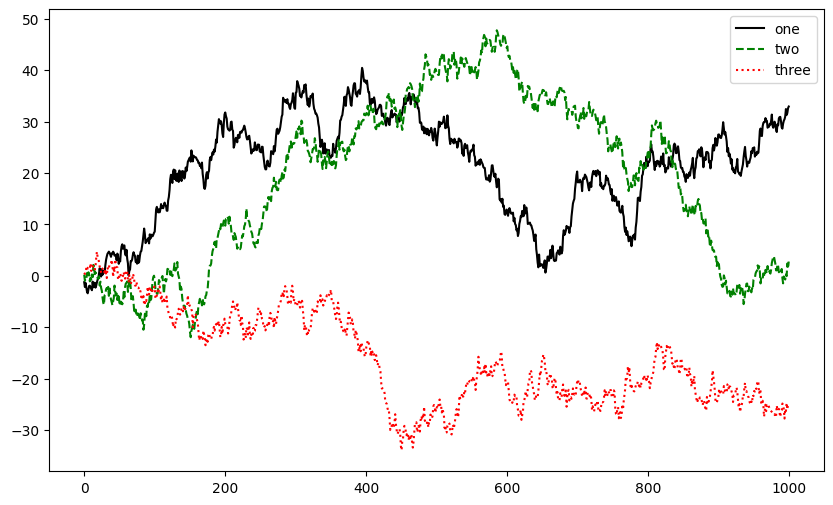

In [60]:
fig, ax = plt.subplots()
ax.plot(np.random.randn(1000).cumsum(), color="black", label="one");
ax.plot(np.random.randn(1000).cumsum(), color="green", linestyle="dashed", label="two");
ax.plot(np.random.randn(1000).cumsum(), color="red", linestyle="dotted", label="three");

# plot 시 label 설정 후 legend 호출
# label 미설정시 범례 표시 안되며, label = "_nolegend_" 설정시 범례 표시 안됨.
ax.legend()

### 1.4. Annotations and Drawing on a Subplot  

- ```text```, ```arrow```, ```annotate``` 함수를 사용해 annotation 추가.

Text(0.5, 1.0, 'Important dates in the 2008–2009 financial crisis')

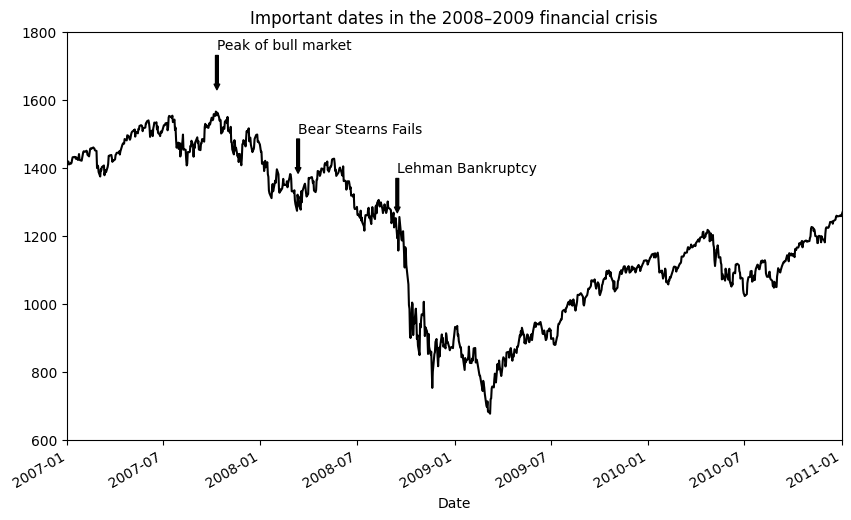

In [62]:
from datetime import datetime

fig, ax = plt.subplots()

# index_col=0 : 첫 번째 열을 인덱스로 설정
# parse_dates=True : 날짜 형식 자동 인식
data = pd.read_csv("examples/spx.csv", index_col=0, parse_dates=True)
spx = data["SPX"]

# data.plot 시에 ax=ax 옵션을 사용하여 기존 plot 위에 데이터 추가
spx.plot(ax=ax, color="black")

# annotation으로 사용하기 위한 주요 이벤트 세팅
crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy")
]

# annotation 추가
# xy : annotation 위치
    ## asof
        ### 시간 기반 데이터에서 특정 시점의 값을 찾는 메서드
        ### 주어진 날짜에 해당하는 데이터 값
        ### 지정된 날짜/시간 이전의 가장 최근 값을 반환
        ### 시간 순서대로 정렬된 데이터에서 특정 시점의 값을 찾을 때 사용
            #### 이전 값 반환: 지정된 날짜가 데이터에 없어도, 그 이전의 가장 최근 값을 반환
            #### 시간 순서 중요: 인덱스가 시간 순서로 정렬되어 있어야 함
            #### NaN 처리: 지정된 날짜 이전에 데이터가 없으면 NaN 반환
                ##### 특히 주식 데이터에 주요하게 사용됨.
                ##### 주식 데이터는 거래일에만 데이터가 있음 (주말, 휴일 제외)
                ##### 특정 날짜를 지정해도 그 날이 거래일이 아닐 수 있음
                ##### asof를 사용하면 가장 최근 거래일의 값을 자동으로 찾아줌
# xytext : annotation 텍스트 위치
# arrowprops : annotation 화살표 속성
for date, label in crisis_data:
    ax.annotate(label, 
                xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor="black", headwidth=4, width=2, headlength=4),
                horizontalalignment="left", 
                verticalalignment="top")

# Zoom in on 2007-2010
# 매뉴얼하게 특정 기간 줌인
ax.set_xlim(["1/1/2007", "1/1/2011"])
ax.set_ylim([600, 1800])

ax.set_title("Important dates in the 2008–2009 financial crisis")

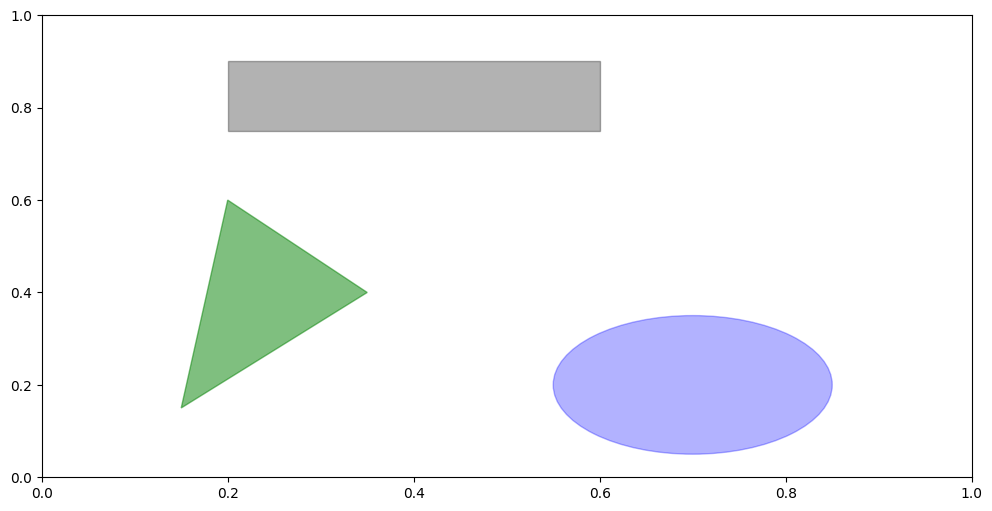

In [69]:
# patches 모듈을 사용하여 다양한 도형 생성 가능
    ## 기하학적 모양을 차트에 추가할 때
    ## 특정 영역을 강조하고 싶을 때
    ## 복잡한 도형을 그려야 할 때
    ## 시각적 요소를 추가하고 싶을 때
        ### 예시
            #### annotation 추가
            #### 히트맵의 셀 표시
            #### 지도에 영역 표시
            
fig, ax = plt.subplots(figsize=(12, 6))
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="black", alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color="blue", alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color="green", alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### 1.5. Saving Plots to File  

- ```fig.savefig("figpath.svg")```  

- ```fig.savefig("figpath.pdf")```  

- ```fig.savefig("figpath.svg", dpi=400)``` : 해상도 세팅 후 저장  

    | 인수 | 설명 |  
    |------|------|  
    | **fname** | 파일 경로를 포함한 문자열 또는 Python 파일류 객체. 그림 형식은 파일 확장자에서 추론됨 (예: .pdf는 PDF, .png는 PNG) |  
    | **dpi** | 인치당 도트 수로 나타낸 그림 해상도. IPython에서는 기본값 100, Jupyter에서는 기본값 72이지만 구성 가능 |  
    | **facecolor** | 서브플롯 외부의 그림 배경색. 기본값은 "w" (흰색) |  
    | **edgecolor** | 그림 테두리 색상 |  
    | **format** | 사용할 명시적 파일 형식 ("png", "pdf", "svg", "ps", "eps", ...) |

### 1.6. matplotlib Configuration

In [70]:
import matplotlib as mpl

# 모든 설정 출력
print(mpl.rcParams)

_internal.classic_mode: False
agg.path.chunksize: 0
animation.bitrate: -1
animation.codec: h264
animation.convert_args: ['-layers', 'OptimizePlus']
animation.convert_path: convert
animation.embed_limit: 20.0
animation.ffmpeg_args: []
animation.ffmpeg_path: ffmpeg
animation.frame_format: png
animation.html: none
animation.writer: ffmpeg
axes.autolimit_mode: data
axes.axisbelow: line
axes.edgecolor: black
axes.facecolor: white
axes.formatter.limits: [-5, 6]
axes.formatter.min_exponent: 0
axes.formatter.offset_threshold: 4
axes.formatter.use_locale: False
axes.formatter.use_mathtext: False
axes.formatter.useoffset: True
axes.grid: False
axes.grid.axis: both
axes.grid.which: major
axes.labelcolor: black
axes.labelpad: 4.0
axes.labelsize: medium
axes.labelweight: normal
axes.linewidth: 0.8
axes.prop_cycle: cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
axes.spines.bottom: True
axes.spines.left: True
axes.spines

In [78]:
# 자주 사용하는 설정들
print(f"Figure size: {mpl.rcParams['figure.figsize']}")
print(f"DPI: {mpl.rcParams['figure.dpi']}")
print(f"Font size: {mpl.rcParams['font.size']}")
print(f"Font family: {mpl.rcParams['font.family']}")
print(f"Font weight: {mpl.rcParams['font.weight']}")
print(f"Line width: {mpl.rcParams['lines.linewidth']}")
print(f"Grid: {mpl.rcParams['axes.grid']}")

Figure size: [10.0, 6.0]
DPI: 100.0
Font size: 10.0
Font family: ['sans-serif']
Font weight: normal
Line width: 1.5
Grid: False


In [ ]:
# 커스터마이징 시 아래의 코드를 사용
plt.rc("font", family="monospace", weight="bold", size=8)

## 2. Plotting with pandas and seaborn

### 2.1. Line Plots  

- 기본적으로 series, dataframe 객체는 plot attribute를 통해 쉽게 선 그래프를 그릴 수 있음.  
- default 설정은 line plot.  

<br>  

- series-specific plot arguments  

    | 인수 | 설명 |  
    |------|------|  
    | **label** | 플롯 범례에 사용할 레이블 |  
    | **ax** | 플롯할 matplotlib 서브플롯 객체. 아무것도 전달하지 않으면 활성 matplotlib 서브플롯을 사용 |  
    | **style** | matplotlib에 전달할 스타일 문자열 (예: "ko--") |  
    | **alpha** | 플롯 채우기 불투명도 (0부터 1까지) |  
    | **kind** | 플롯 유형. "area", "bar", "barh", "density", "hist", "kde", "line", "pie" 중 선택 가능. 기본값은 "line" |  
    | **figsize** | 생성할 그림 객체의 크기 |  
    | **logx** | x축에 로그 스케일링을 적용하려면 True 전달. 음수 값을 허용하는 대칭 로그를 원하면 "sym" 전달 |  
    | **logy** | y축에 로그 스케일링을 적용하려면 True 전달. 음수 값을 허용하는 대칭 로그를 원하면 "sym" 전달 |  
    | **title** | 플롯에 사용할 제목 |  
    | **use_index** | 틱 레이블에 객체 인덱스 사용 |  
    | **rot** | 틱 레이블의 회전 각도 (0부터 360까지) |  
    | **xticks** | x축 틱에 사용할 값들 |  
    | **yticks** | y축 틱에 사용할 값들 |  
    | **xlim** | x축 한계 (예: [0, 10]) |  
    | **ylim** | y축 한계 |  
    | **grid** | 축 그리드 표시 (기본적으로 비활성화) |  

<br>  

- dataframe-specific plot arguments  

    | 인수 | 설명 |  
    |------|------|  
    | **subplots** | 각 DataFrame 컬럼을 별도의 서브플롯에 플롯 |  
    | **layout** | 서브플롯의 레이아웃을 제공하는 2-tuple (행, 열) |  
    | **sharex** | subplots=True일 때, 동일한 x축을 공유하여 틱과 한계를 연결 |  
    | **sharey** | subplots=True일 때, 동일한 y축을 공유 |  
    | **legend** | 서브플롯 범례 추가 (기본값은 True) |  
    | **sort_columns** | 컬럼을 알파벳 순으로 플롯. 기본적으로는 기존 컬럼 순서 사용 |

<Axes: >

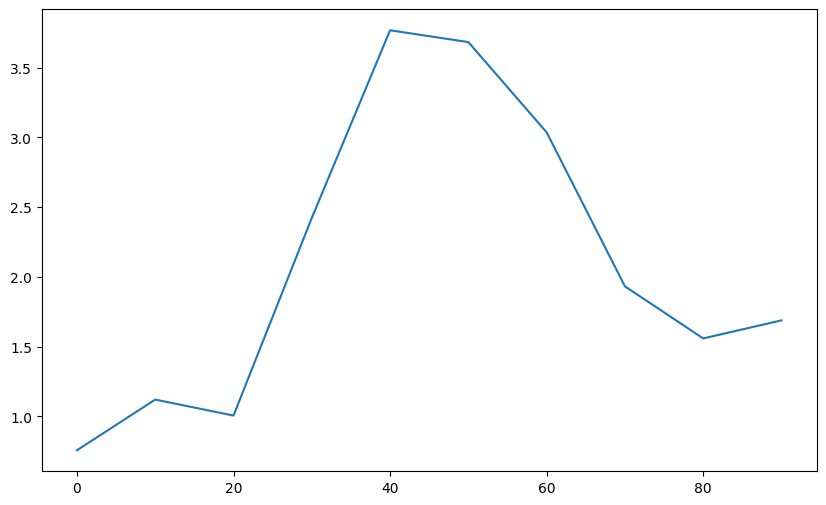

In [ ]:
# Series 객체의 plot
s = pd.Series(np.random.standard_normal(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

<Axes: >

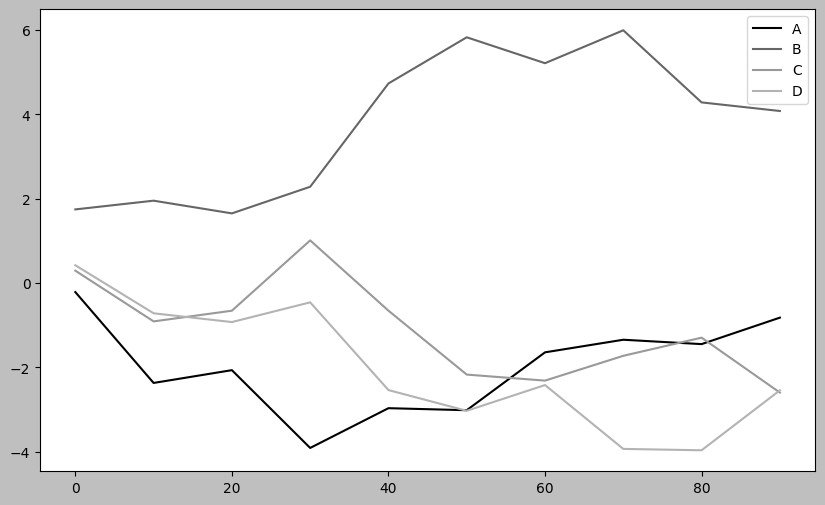

In [ ]:
# dataframe 객체의 plot
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0),
                  columns=["A", "B", "C", "D"],
                  index=np.arange(0, 100, 10))
plt.style.use('grayscale')

# dataframe의 각 column을 서로 다른 선으로 인식하여 다른 색상으로 표시
# legend 자동 표시
df.plot.line()

### 2.2. Bar Plots  

- ```data.plt.bar()```  

- ```seaborn.barplot()```  


<Axes: >

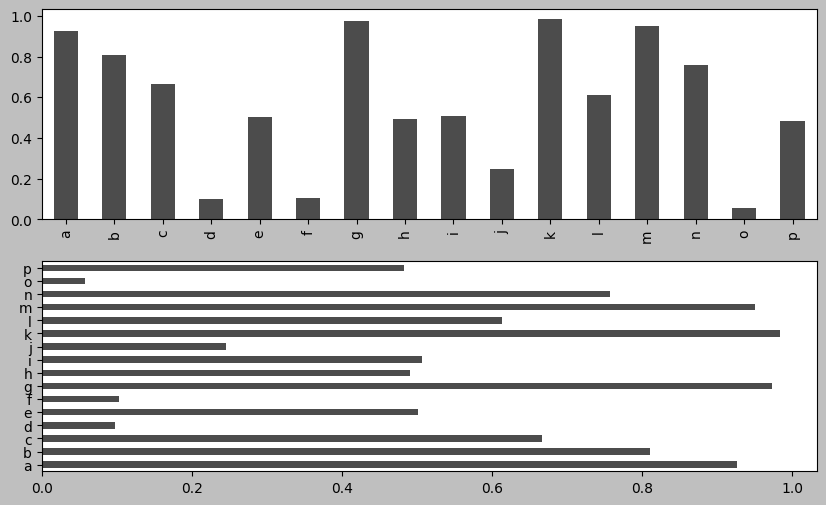

In [ ]:
# Series 객체의 plot
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.uniform(size=16), index=list("abcdefghijklmnop"))

# vertical bar plot
# index 값이 x축, 값이 y축
data.plot.bar(ax=axes[0], color="black", alpha=0.7)

# horizontal bar plot
# index 값이 y축, 값이 x축
data.plot.barh(ax=axes[1], color="black", alpha=0.7)

Genus         A         B         C         D
one    0.270931  0.985907  0.357497  0.343950
two    0.691732  0.660481  0.927737  0.974552
three  0.575443  0.457751  0.057770  0.088229
four   0.687153  0.556418  0.671748  0.529354
five   0.129125  0.301896  0.526537  0.751607
six    0.025968  0.170704  0.498786  0.689375


<Axes: >

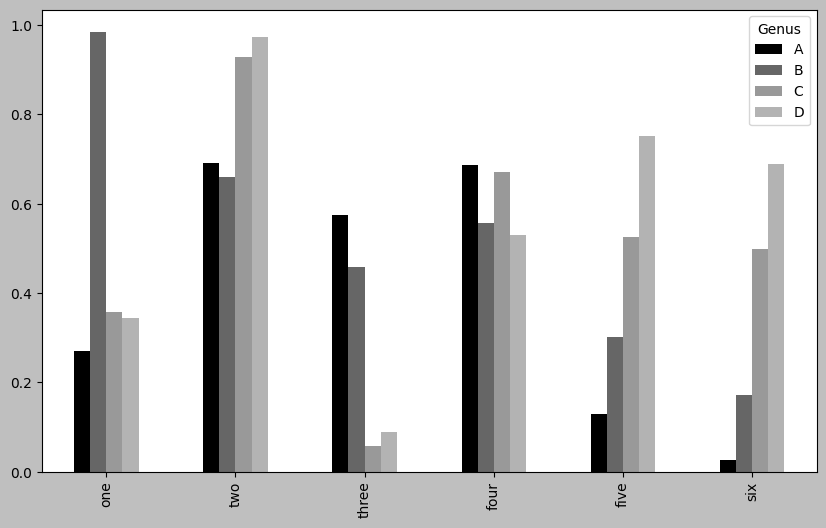

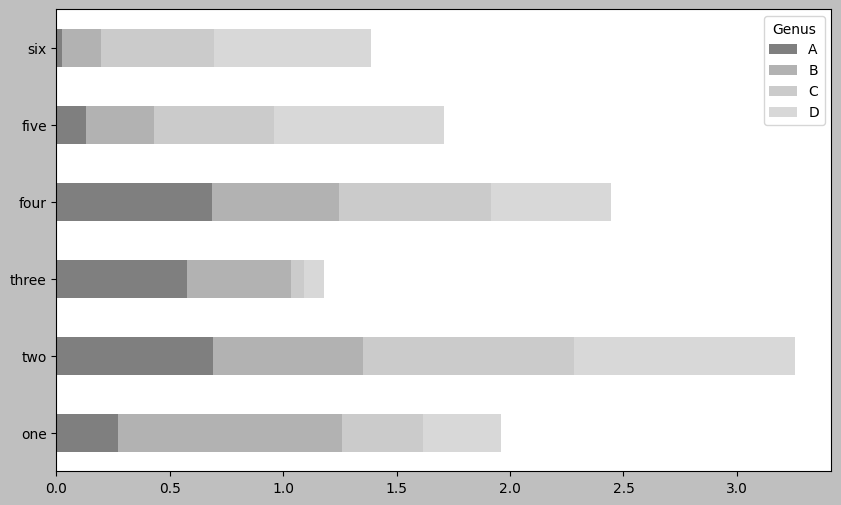

In [89]:
# dataframe 객체의 plot
df = pd.DataFrame(np.random.uniform(size=(6, 4)),
                  index=["one", "two", "three", "four", "five", "six"],
                  columns=pd.Index(["A", "B", "C", "D"], 
                  name="Genus"))
print(df)

df.plot.bar()
df.plot.barh(stacked=True, alpha=0.5)

In [90]:
tips = pd.read_csv("examples/tips.csv")
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [93]:
# crosstab : 두 개의 컬럼을 교차하여 빈도수 계산
party_counts = pd.crosstab(tips["day"], tips["size"])
party_counts = party_counts.reindex(index=["Thur", "Fri", "Sat", "Sun"])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [94]:
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Thur,48,4,5,1
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3


size         2         3         4         5
day                                         
Thur  0.827586  0.068966  0.086207  0.017241
Fri   0.888889  0.055556  0.055556  0.000000
Sat   0.623529  0.211765  0.152941  0.011765
Sun   0.520000  0.200000  0.240000  0.040000


<Axes: xlabel='day'>

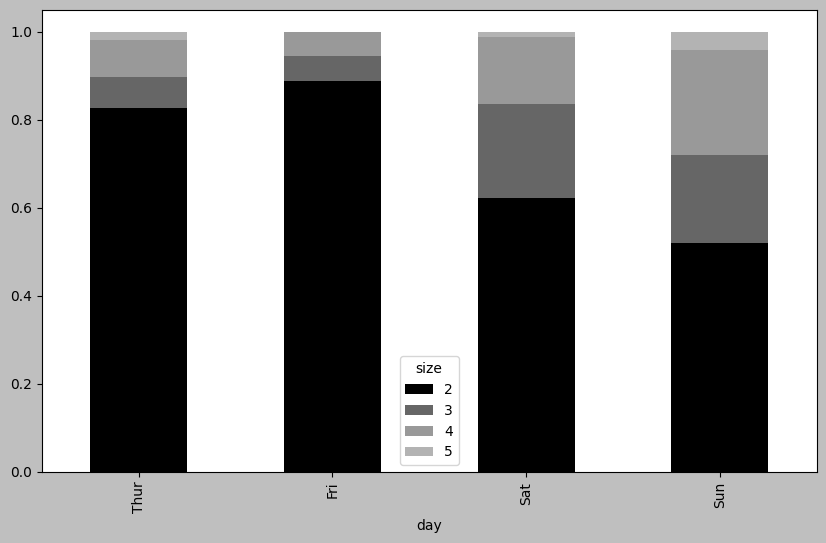

In [97]:
# Normalize to sum to 1
# div : 각 행의 값을 해당 행의 합으로 나누어 비율로 변환
# 동일 행을 따라 비율 계산
party_pcts = party_counts.div(party_counts.sum(axis="columns"), axis="index")
print(party_pcts)

party_pcts.plot.bar(stacked=True)

   total_bill   tip smoker  day    time  size   tip_pct
0       16.99  1.01     No  Sun  Dinner     2  0.063204
1       10.34  1.66     No  Sun  Dinner     3  0.191244
2       21.01  3.50     No  Sun  Dinner     3  0.199886
3       23.68  3.31     No  Sun  Dinner     2  0.162494
4       24.59  3.61     No  Sun  Dinner     4  0.172069


<Axes: xlabel='tip_pct', ylabel='day'>

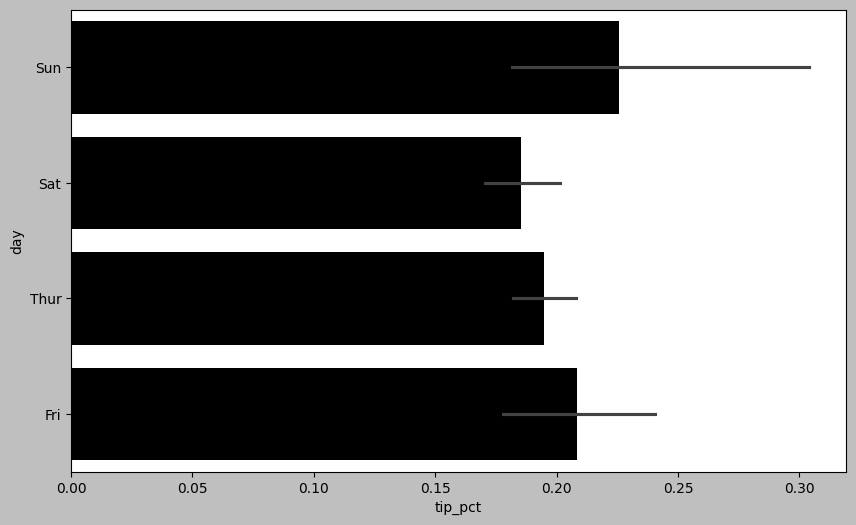

In [106]:
tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
print(tips.head())

# seaborn : 연산한 tip_pct 값의 요일별 평균을 자동으로 계산하여 막대 그래프 생성
    ## 95% 신뢰구간 표시
    ## plot.bar를 사용하는 경우에는 각 요일별 평균을 직접 계산해야 함
sns.barplot(x="tip_pct", y="day", data=tips, orient="h")

<Axes: xlabel='tip_pct', ylabel='day'>

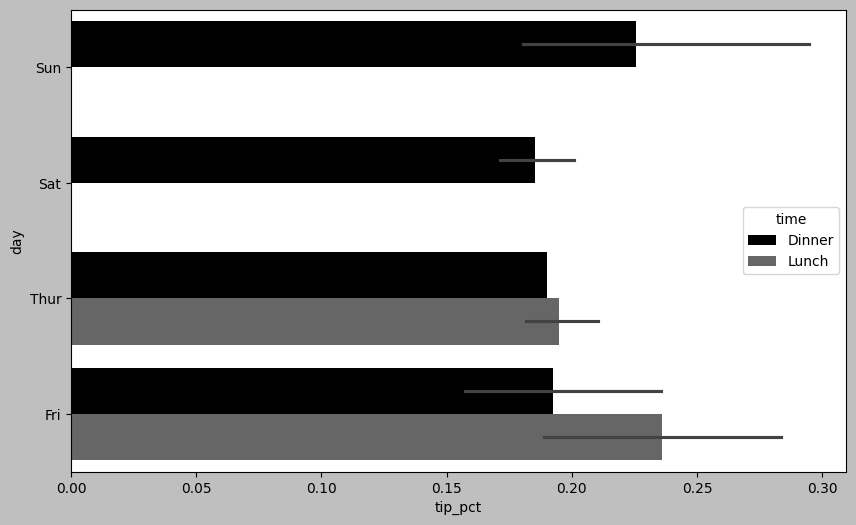

In [107]:
# hue : 추가적인 범주형 변수를 기준으로 색상 분리
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h")

In [108]:
# 그리드 스타일 설정
sns.set_style("whitegrid")

In [109]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

### 2.3. Histograms and Density Plots  


- histogram : 값 빈도를 이산화하여 표시하는 일종의 막대 그래프  

    - 데이터 포인트는 균일한 간격의 개별 빈으로 분할되고 각 빈의 데이터 포인트 수가 표시  

    - ```data.plt.hist()```  

    - ```seaborn.histplot(data)```  


<br>  

- density plot : 관측된 데이터를 생성했을 수 있는 연속 확률 분포의 추정치를 계산하여, 데이터의 확률 밀도 함수를 추정.  

    - 각 데이터 포인트 주변에 커널(가우시안 커널 등)을 배치하고 합산한 후, 정규화하여 정규 분포와 같은 단순한 분포로 근사화하는 방식으로 추정함.  

    - 따라서 density plot은 커널 밀도 추정(KDE) 도표라고도 함.  

    - histogram의 불연속적, 구간 선택에 의존한다는 한계를 넘어 연속적이고 부드러운 분포의 추정이 가능함.  
    
    - ```data.plot.desity()```  

    - ```seaborn.histplot(data, kde=True)```

<Axes: ylabel='Frequency'>

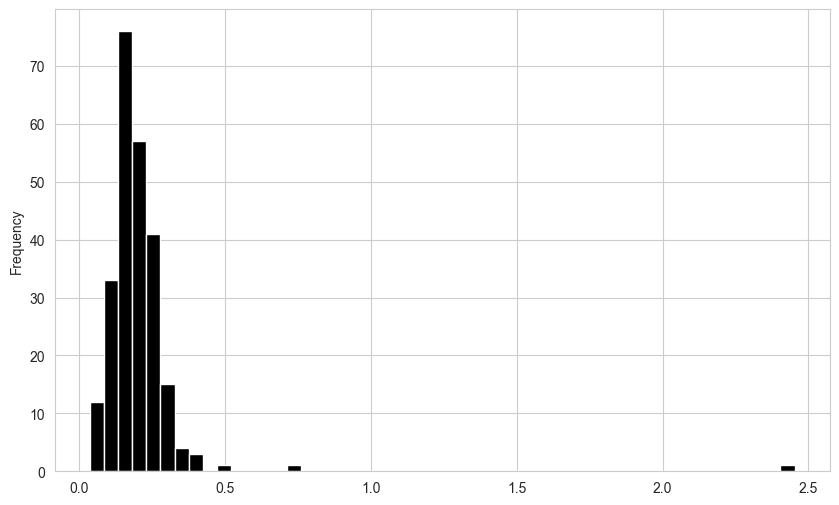

In [110]:
tips["tip_pct"].plot.hist(bins=50)

<Axes: ylabel='Density'>

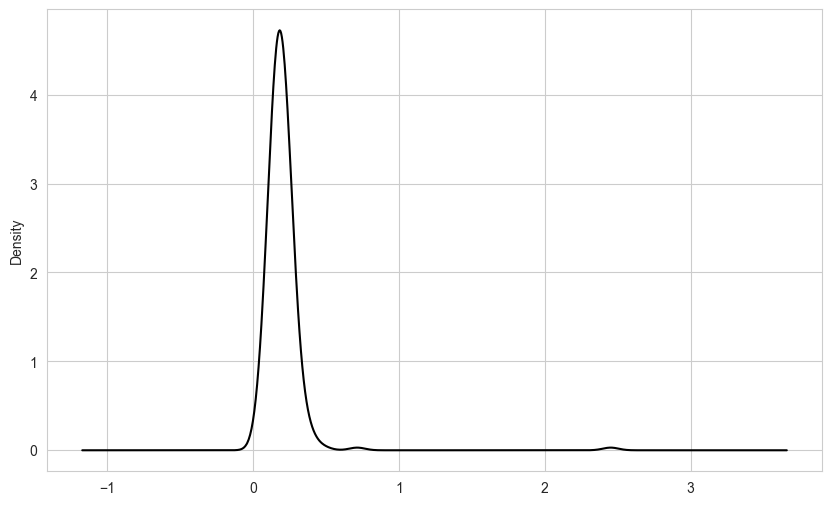

In [111]:
tips["tip_pct"].plot.density()

<Axes: xlabel='tip_pct', ylabel='Count'>

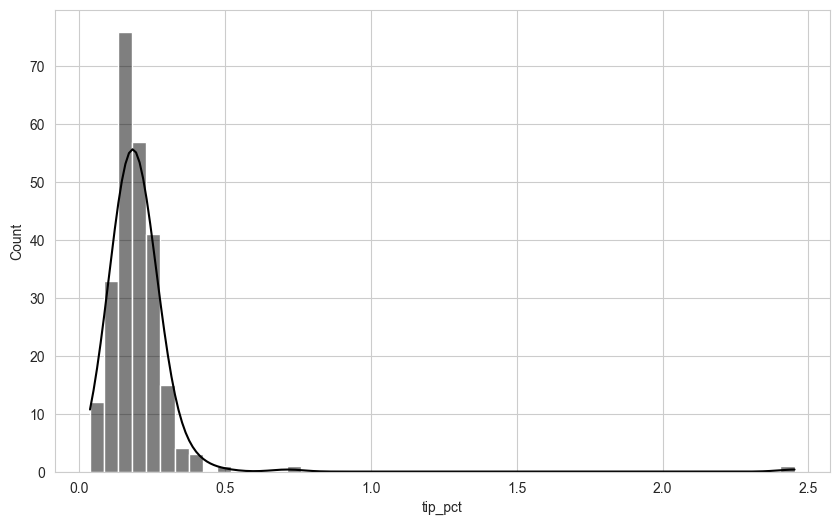

In [122]:
sns.histplot(tips["tip_pct"], kde=True, bins=50)

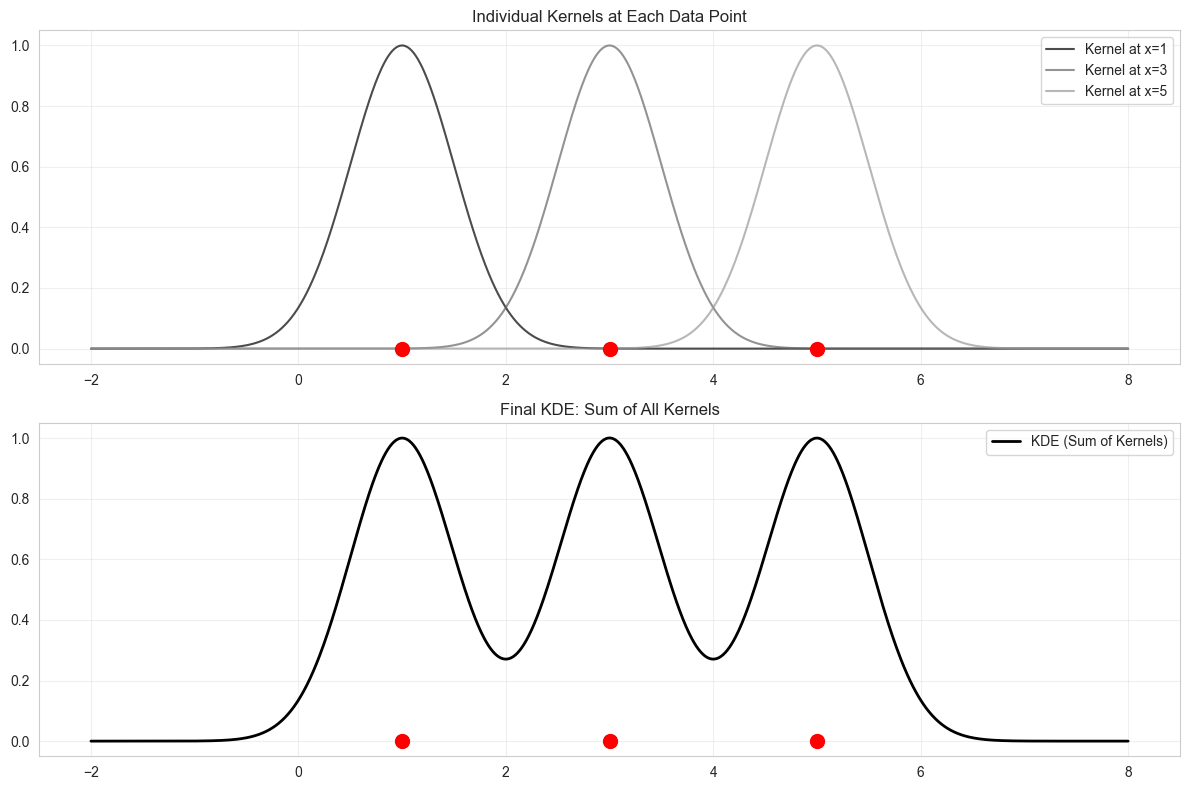

In [116]:
# 커널 밀도 추정(KDE) 이론 시각화

import numpy as np
import matplotlib.pyplot as plt

# 예시 데이터: 3개의 포인트
data_points = [1, 3, 5]

# 각 포인트 주변에 가우시안 커널 배치
x = np.linspace(-2, 8, 1000)

# 각 포인트에 대한 가우시안 커널 생성
# 분모의 제곱은 커널의 너비를 조절하는 역할을 함.
# 분모의 제곱이 작으면 커널의 너비가 줄어들어 더 민감하게 반응.
# 분모의 제곱이 크면 커널의 너비가 넓어져 덜 민감하게 반응.
# def gaussian_kernel(x, center, bandwidth):
    # return np.exp(-0.5 * ((x - center) / bandwidth)**2)
kernel1 = np.exp(-0.5 * ((x - 1) / 0.5)**2)  # 포인트 1 주변
kernel2 = np.exp(-0.5 * ((x - 3) / 0.5)**2)  # 포인트 3 주변  
kernel3 = np.exp(-0.5 * ((x - 5) / 0.5)**2)  # 포인트 5 주변

# 시각화
plt.figure(figsize=(12, 8))

# 개별 커널들
plt.subplot(2, 1, 1)
plt.plot(x, kernel1, label='Kernel at x=1', alpha=0.7)
plt.plot(x, kernel2, label='Kernel at x=3', alpha=0.7)
plt.plot(x, kernel3, label='Kernel at x=5', alpha=0.7)
plt.scatter(data_points, [0, 0, 0], color='red', s=100, zorder=5)
plt.title('Individual Kernels at Each Data Point')
plt.legend()
plt.grid(True, alpha=0.3)

# 모든 커널의 합 (KDE)
plt.subplot(2, 1, 2)
total_kde = kernel1 + kernel2 + kernel3
plt.plot(x, total_kde, 'k-', linewidth=2, label='KDE (Sum of Kernels)')
plt.scatter(data_points, [0, 0, 0], color='red', s=100, zorder=5)
plt.title('Final KDE: Sum of All Kernels')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

<Axes: ylabel='Count'>

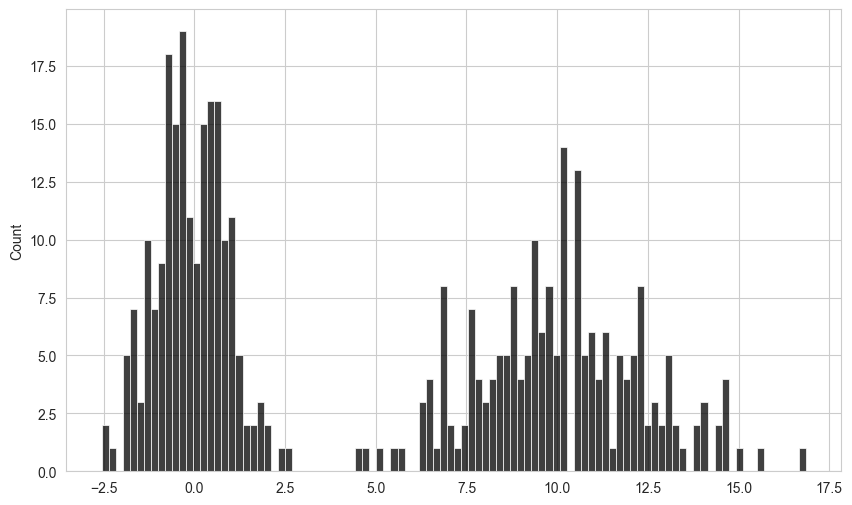

In [117]:
comp1 = np.random.standard_normal(200)
comp2 = 10 + 2 * np.random.standard_normal(200)
values = pd.Series(np.concatenate([comp1, comp2]))

sns.histplot(values, bins=100, color="black")

### 2.4. Scatter or Point Plots  

- 두개의 1차원 데이터 간의 관계를 설명하기 위해 유용한 시각화 방법  

    - ```seaborn.regplot(x, y, data)```  


- EDA 시에는 모든 변수 간의 관계를 확인하는 것이 중요함.  

    - ```seaborn.pairplot(data, diag_kind, plot_kws)```  

        - plot_kws : pairplot의 각 subplot에 공통적으로 적용할 스타일 옵션 (딕셔너리 형태)  


In [125]:
macro = pd.read_csv("examples/macrodata.csv")
data = macro[["cpi", "m1", "tbilrate", "unemp"]]

# log 변환 후 차이 계산
trans_data = np.log(data).diff().dropna()
trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5, 1.0, 'Changes in log(m1) versus log(unemp)')

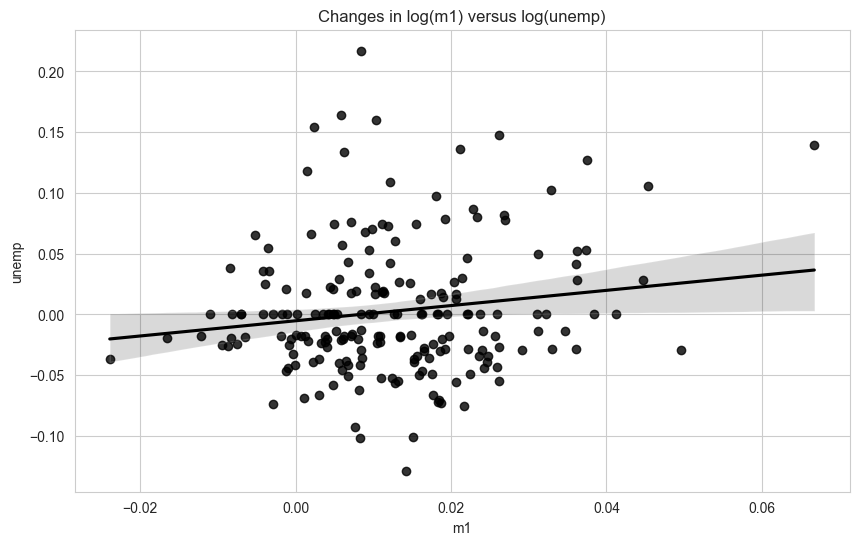

In [126]:
# scatter plot
# 두 변수 간의 선형 관계를 확인하는 데 유용
ax = sns.regplot(x="m1", y="unemp", data=trans_data)
ax.set_title("Changes in log(m1) versus log(unemp)")

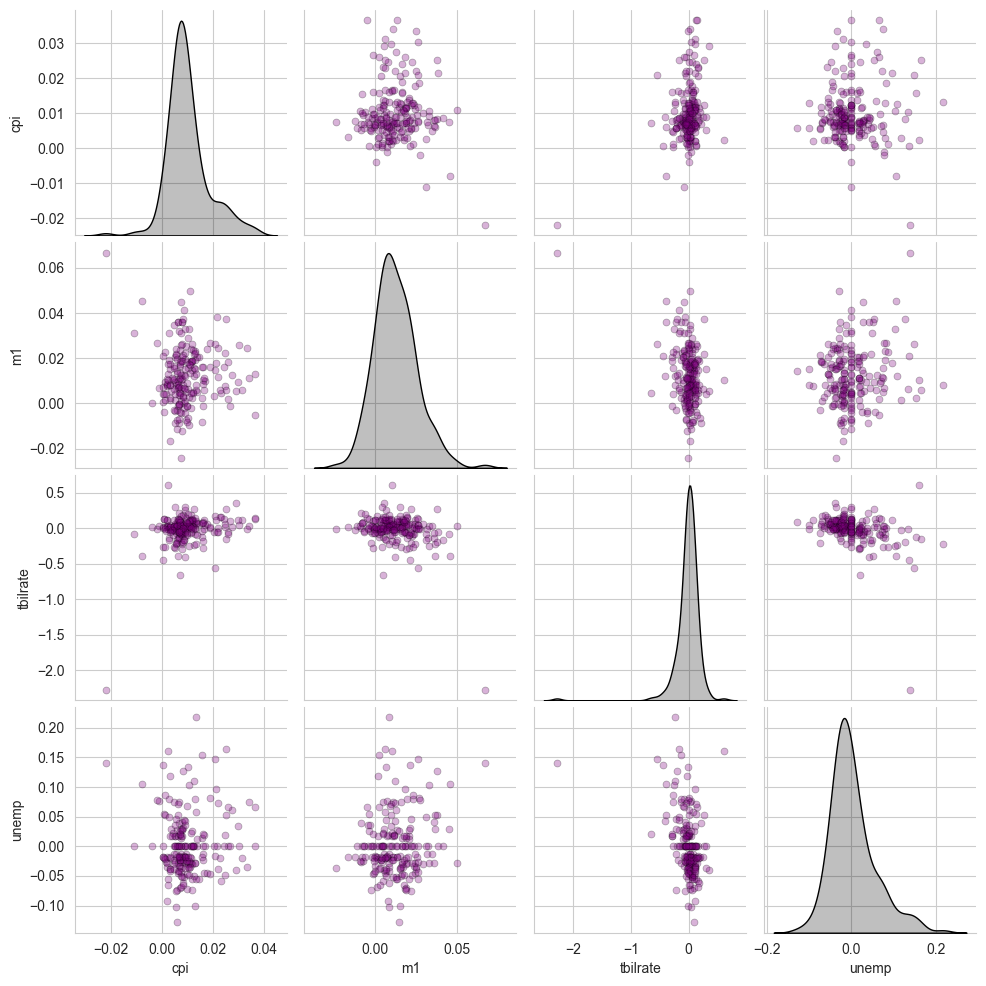

In [133]:
# EDA 시에는 모든 변수 간의 관계를 확인하는 것이 중요
# 모든 변수 간의 관계를 확인하기 위해 pairplot 사용

sns.pairplot(trans_data, 
             diag_kind="kde", 
             plot_kws={"alpha": 0.3,
                       "s": 25,
                       "color": "purple",
                       "edgecolors": "black",
                       "linewidth": 0.5})

### 2.5. Facet Grids and Categorical Data  

- Facet Grid  

    - 다양한 범주형 변수가 있어 추가로 그룹화할 차원이 있는 데이터의 경우, Facet Grid를 사용.  

    - 특정 변수의 개별 값을 기준으로 데이터가 분할되는 레이아웃을 가지고 있음.  

    - ```seaborn.catplot(x, y, hue, row, col, kind, data)```

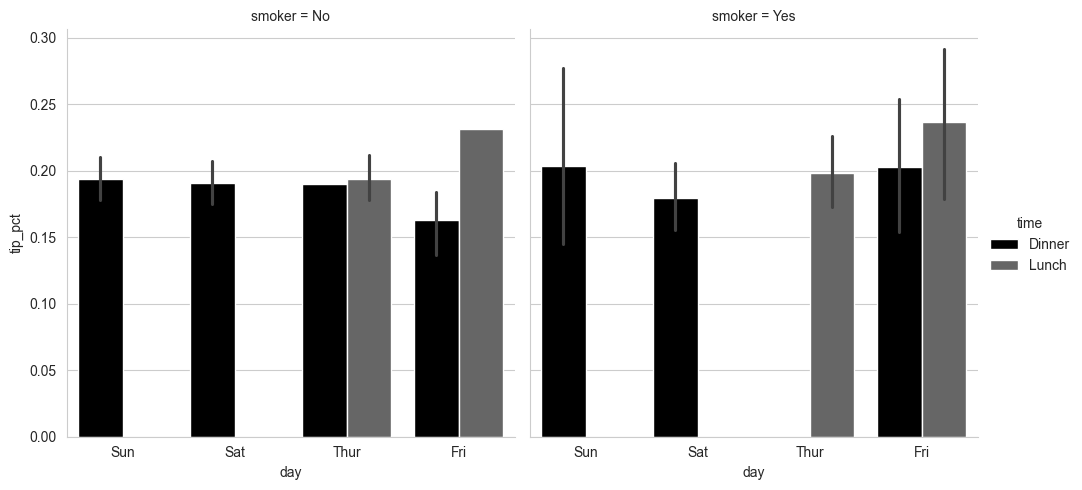

In [ ]:
sns.catplot(x="day", # 범주형 변수
            y="tip_pct", # 연속형 변수
            hue="time", # 범주형 변수 : 색상 분리
            col="smoker", # 범주형 변수 : 열 분리
            kind="bar", # 그래프 유형
            data=tips[tips.tip_pct < 1])

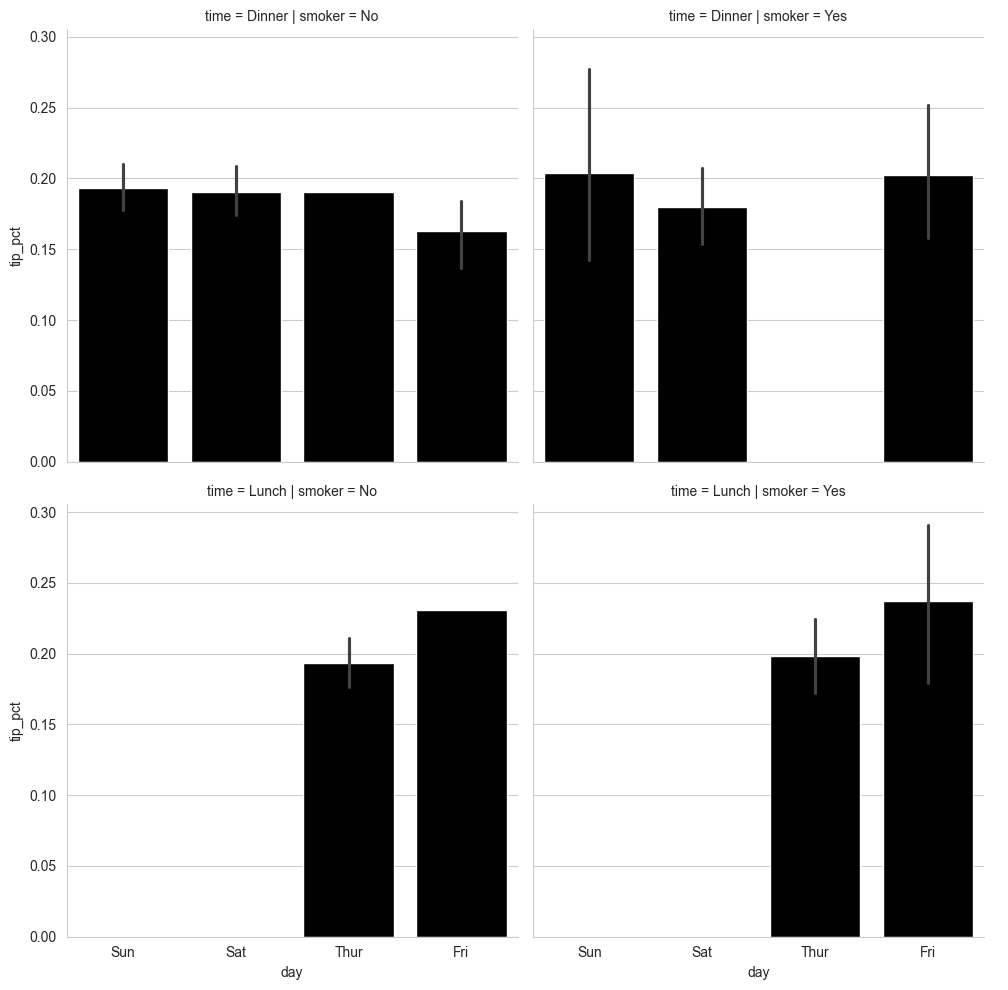

In [ ]:
sns.catplot(x="day", # 범주형 변수
            y="tip_pct", # 연속형 변수
            row="time", # 범주형 변수 : 행 분리
            col="smoker", # 범주형 변수 : 열 분리
            kind="bar", # 그래프 유형
            data=tips[tips.tip_pct < 1])

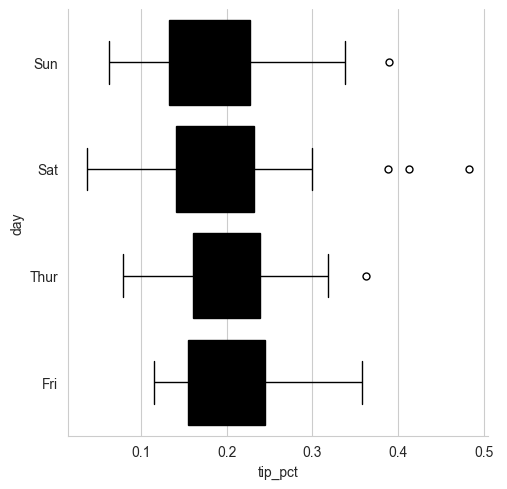

In [136]:
sns.catplot(x="tip_pct", 
            y="day", 
            kind="box",
            data=tips[tips.tip_pct < 0.5])